### Load Library:

In [1]:
import numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Dataset Preparation:

In [2]:
data = pd.read_csv('DIA_trainingset_RDKit_descriptors.csv') # load dataset

instances = data.iloc[:-1, 1:] # get instances
labels = data.iloc[:-1, 1] # get labels

# Include only continuous and numerical features
instances = instances.select_dtypes(include=[np.number]) # select only numerical features
#instances = instances.dropna(axis=1, how='any') # drop columns with NaN values
#instances = instances.drop(columns=['ID']) # drop ID column

#instances = instances.drop(columns=['SMILES']) # drop SMILES column

### Principal Component Analysis PCA:

PCA Components:
Number of components:
2
PCA Components:
[[-0.08669729  0.14259569  0.16406871  0.16162369  0.16167933  0.16265496
   0.15912884  0.15967224  0.15633376  0.15630695  0.14812019  0.14808876
   0.13859608  0.14116651  0.10834302  0.10438221  0.04253855  0.10345415
   0.07754605  0.04644252  0.04335304  0.05653131  0.04302221  0.01482548
   0.03975607  0.16089951  0.03323477 -0.0947445   0.16373224  0.15938147
   0.05247243  0.15865341  0.12892712 -0.01814772  0.16266036  0.10092901
   0.03210947  0.10092901  0.04974023 -0.05415917  0.05571516 -0.03355296
  -0.03465435  0.03546949  0.15730347  0.16084114  0.04817202  0.11631727
   0.05948712  0.07766471  0.09588052  0.02225062  0.01903377  0.02874678
   0.12098182  0.05852671  0.11026503 -0.          0.09055474  0.05281244
   0.07688953  0.09080616  0.16441419  0.10210396  0.07975364  0.06136599
   0.05750829  0.02122601  0.04521549  0.08682959  0.03246611 -0.00733886
   0.00599917  0.05841151  0.09241776  0.08616365  0.086

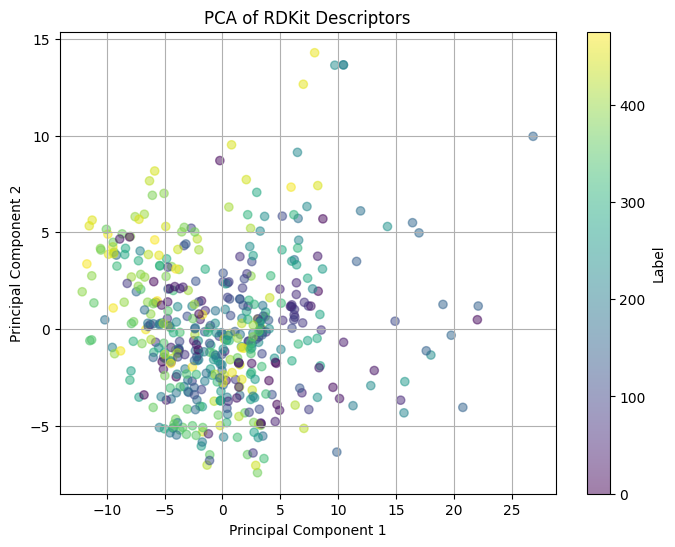

In [8]:
# Apply PCA to the dataset
from sklearn.preprocessing import StandardScaler  # Standardize the data
from sklearn.decomposition import PCA # PCA module

# Standrize: its important to standrize the data before implementing PCA 
scaler = StandardScaler() # create a StandardScaler object
scaler.fit(instances) # fit the scaler to the data
instances = scaler.transform(instances) # transform the data

# Perform PCA
no_components = 2 # number of components to keep
pca = PCA(n_components= no_components) # reduce to 2 dimensions
pca_result = pca.fit_transform(instances) # fit and transform the data

# Create a DataFrame with PCA results and labels
columns = ['PC' + str(i+1) for i in range(no_components)] # create column names for PCA components
pca_df = pd.DataFrame(data=pca_result, columns=columns) # create DataFrame with PCA results
pca_df['Label'] = labels # add labels to DataFrame

# Ensure labels are numeric for visualization
if not np.issubdtype(pca_df['Label'].dtype, np.number):
    print("Warning: Labels are non-numeric. Encoding labels for visualization.")
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    pca_df['Label'] = le.fit_transform(pca_df['Label'])

# PLOTING: print the obtained PCA components and explained variance
print("PCA Components:")
# Dcending order of explained variance
print("Number of components:")
print(pca.n_components_) # print number of components
print("PCA Components:")
print(pca.components_) # print PCA components
print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_) # print explained variance ratio
print("Explained Variance:")
print(pca.explained_variance_) # print explained variance
print("Mean:")
print(pca.mean_) # print mean of the data

# VISUALIZATION: Visualize reduced data
plt.figure(figsize=(8, 6)) # set figure size
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Label'], cmap='viridis', alpha=0.5) # scatter plot
plt.title('PCA of RDKit Descriptors') # set title
plt.xlabel('Principal Component 1') # set x-axis label
plt.ylabel('Principal Component 2') # set y-axis label
plt.colorbar(label='Label') # add color bar
plt.grid(True) # add grid
plt.show() # show plot


### Classical Manifold:

### Modering Manifold: